# Electric Vehicle Population Data

- Mateo Orozco Baldovino
- Actividad Sabado 28 de Febrero

# Caracteristicas de la base de datos

This dataset shows the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through Washington State Department of Licensing (DOL).

https://catalog.data.gov/dataset/electric-vehicle-population-data



In [ ]:
# Importar la base de datos 
import pandas as pd
df  = pd.read_csv('C:/Users/salasistemas.UTB/Desktop/MachineLearning/Datos/Vehiculos/ElectricVehicle.csv')
df.head(3)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EBXJ,Yakima,Yakima,WA,98902.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,14.0,131356970,POINT (-120.51904 46.59783),PACIFICORP,5.307700e+10
1,1N4BZ0CP2G,King,Kent,WA,98030.0,2016,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,33.0,211702123,POINT (-122.19975 47.37483),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
2,1C4JJXP64P,Snohomish,Marysville,WA,98271.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,38.0,238694900,POINT (-122.17138 48.10433),PUGET SOUND ENERGY INC,5.306194e+10


In [2]:
df = df.iloc[270000:]

In [3]:
# Ver longitud de la base de datos
len(df)

6828

In [4]:
# Ver columnas de la base de datos 
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Legislative District', 'DOL Vehicle ID', 'Vehicle Location',
       'Electric Utility', '2020 Census Tract'],
      dtype='str')

In [5]:
# Ver tipos de datos de cada columna. Para este caso la variable predictora sera Electric Range.
df.dtypes

VIN (1-10)                                               str
County                                                   str
City                                                     str
State                                                    str
Postal Code                                          float64
Model Year                                             int64
Make                                                     str
Model                                                    str
Electric Vehicle Type                                    str
Clean Alternative Fuel Vehicle (CAFV) Eligibility        str
Electric Range                                       float64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                         str
Electric Utility                                         str
2020 Census Tract                                    float64
dtype: object

In [6]:
# Ver datos nulos y datos duplicados
print(f"La cantidad de datos nulos es de: \n{df.isnull().sum()}")
print(f"La cantidad de datos duplicados es de: {df.duplicated().sum()}")

La cantidad de datos nulos es de: 
VIN (1-10)                                             0
County                                                 9
City                                                   9
State                                                  0
Postal Code                                            9
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Legislative District                                 143
DOL Vehicle ID                                         0
Vehicle Location                                      14
Electric Utility                                       9
2020 Census Tract                                      9
dtype: int64
La cantidad de datos duplicados es de: 0

In [7]:
# Eliminar datos nulos
df = df.dropna()

In [8]:
# Eliminar columnas que no utilizare en el analisis
df = df.drop(['Model', 'Postal Code', 'City', 'VIN (1-10)', 'County', 'Legislative District', 'DOL Vehicle ID', 'Vehicle Location', '2020 Census Tract', 'State', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Utility'], axis=1)

In [ ]:
df.head(3)

# Modelo Random Forest Regressor 

Desarrollar un modelo de random forest regressor para predecir el rango electrico de los vehiculos. Para esto se debe realizar la codificacion de las variables categoricas, dividir la base de datos en entrenamiento y prueba, entrenar el modelo y evaluar su desempeño.

In [ ]:
# Importando las librerias necesarias para el modelo
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import cross_validate
import joblib
import sklearn
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Seleccionando las varibles predictoras y la variable objetivo
X = df[['Model Year', 'Make', 'Electric Vehicle Type']]
y = df['Electric Range']

# Columnas categóricas y numéricas
categorical_features = ['Make', 'Electric Vehicle Type']
numeric_features = ['Model Year']

# Preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numeric_features)
    ]
)

# Modelo
model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

# Pipeline completo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42
)

In [25]:
from sklearn.model_selection import GridSearchCV

# Definimos la rejilla de parámetros (el prefijo 'model__' es por el nombre en el Pipeline)
param_grid = {
    'model__n_estimators': [100, 300, 500],
    'model__max_depth': [None, 10, 20],
    'model__max_features': ['sqrt', 0.5]
}

# Configuramos la búsqueda con Validación Cruzada (5 folds)
grid_search = GridSearchCV(
    pipeline, 
    param_grid, 
    cv=5, 
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Entrenamos (esto hará el preprocesamiento y la CV automáticamente)
grid_search.fit(X_train, y_train)

print(f"Mejores parámetros: {grid_search.best_params_}")

Mejores parámetros: {'model__max_depth': None, 'model__max_features': 'sqrt', 'model__n_estimators': 500}


In [29]:
from sklearn.inspection import permutation_importance

best_model = grid_search.best_estimator_

# Importancia por permutación en el set de TEST
results = permutation_importance(
    best_model, X_test, y_test, n_repeats=10, random_state=42
)

# Visualización rápida
import pandas as pd
importance_df = pd.DataFrame({'feature': X.columns, 'importance': results.importances_mean})
print(importance_df.sort_values(by='importance', ascending=False))

                 feature  importance
0             Model Year    1.833407
1                   Make    0.205110
2  Electric Vehicle Type    0.174309


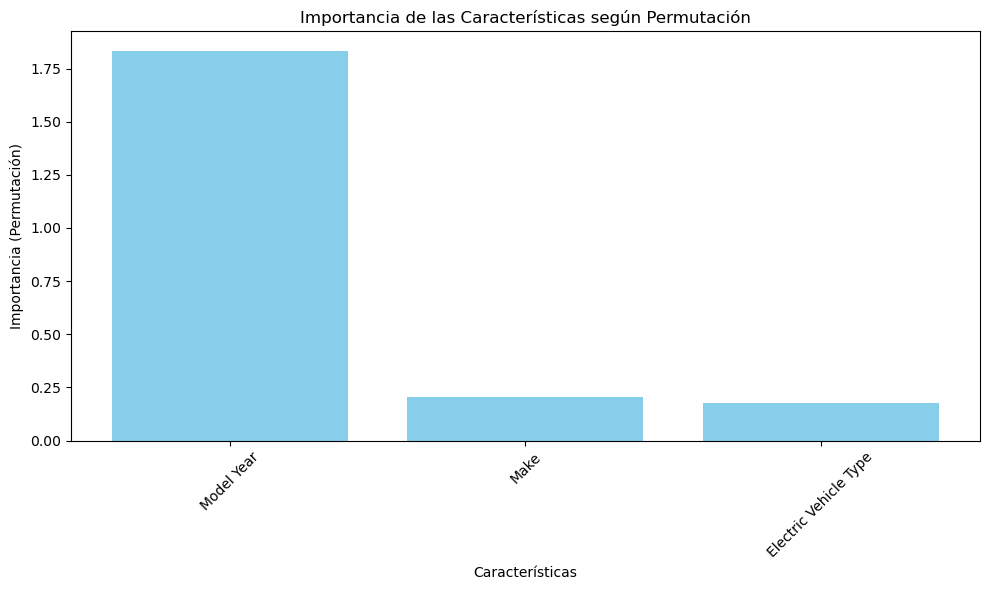

In [33]:
# Grafico de barras con la importancia de las variables del modelo, ordenado de mayor a menor importancia.
importance_df = pd.DataFrame({'feature': X.columns, 'importance': results.importances_mean})
importance_df = importance_df.sort_values(by='importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(importance_df['feature'], importance_df['importance'], color='skyblue')
plt.xlabel("Características")
plt.ylabel("Importancia (Permutación)")
plt.title("Importancia de las Características según Permutación")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
import joblib
from sklearn.metrics import mean_absolute_error, r2_score

# Predicción final
final_preds = best_model.predict(X_test)

print(f"MAE Final: {mean_absolute_error(y_test, final_preds)}")
print(f"R2 Final: {r2_score(y_test, final_preds)}")

# Guardar para usar en otra app o script
joblib.dump(best_model, 'modelo_autonomia_ev.joblib')

MAE Final: 2.3676818109791085
R2 Final: 0.981717014997004


['modelo_autonomia_ev.joblib']

------------------------------
RESULTADOS EN TEST (Hold-out)
------------------------------
RMSE: 11.58 (Error cuadrático medio)
MAE:  2.41 (Error absoluto promedio)
R2:   0.9776 (Varianza explicada)
------------------------------


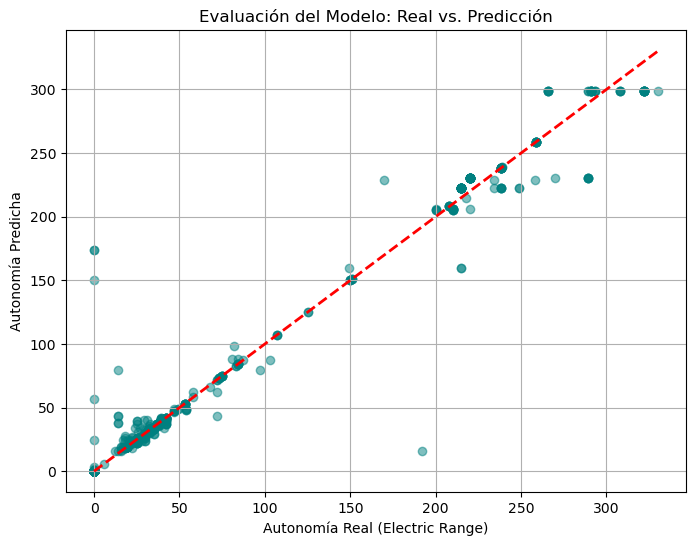

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Realizar predicciones con el mejor modelo (el del GridSearch)
y_pred = best_model.predict(X_test)

# 2. Cálculo de métricas
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("-" * 30)
print(f"RESULTADOS EN TEST (Hold-out)")
print("-" * 30)
print(f"RMSE: {rmse:.2f} (Error cuadrático medio)")
print(f"MAE:  {mae:.2f} (Error absoluto promedio)")
print(f"R2:   {r2:.4f} (Varianza explicada)")
print("-" * 30)

# 3. Visualización: Real vs. Predicho
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Línea de identidad
plt.xlabel("Autonomía Real (Electric Range)")
plt.ylabel("Autonomía Predicha")
plt.title("Evaluación del Modelo: Real vs. Predicción")
plt.grid(True)

Esta gráfica de dispersión indica que tu modelo tiene una alta capacidad predictiva general, especialmente en vehículos de autonomía baja y media (0-100 km) donde los puntos se agrupan estrechamente sobre la línea de identidad roja, pero presenta una pérdida de precisión y mayor variabilidad en rangos superiores a los 200 km. La presencia de puntos alejados de la diagonal revela errores significativos: algunos casos de subestimación grave, donde vehículos con autonomía real de 200 km son predichos con valores cercanos a cero, y casos de sobreestimación, donde el modelo asigna autonomía a vehículos que en la realidad no la reportan. En términos estadísticos, esto sugiere que aunque el coeficiente $R^2$ sea favorable por la tendencia global, el error RMSE se verá penalizado por estos valores atípicos (outliers), indicando que al modelo le faltan variables explicativas (como la capacidad de la batería) para captar con exactitud el comportamiento de los vehículos de alto rendimiento.

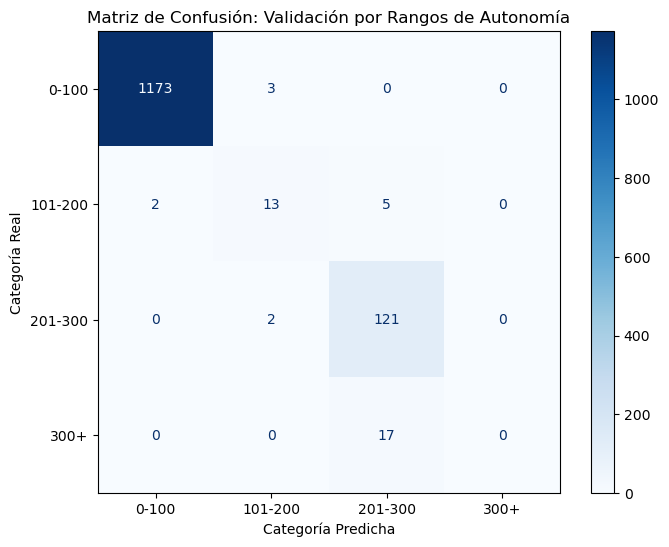

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# 1. Definir rangos que cubran todo el espectro (incluyendo el 0)
# Usamos include_lowest=True para que el valor 0 no quede como NaN
bins = [-1, 100, 200, 300, np.inf] 
labels = ['0-100', '101-200', '201-300', '300+']

# 2. Categorizar valores reales y predichos
y_test_cat = pd.cut(y_test, bins=bins, labels=labels, include_lowest=True)
y_pred_cat = pd.cut(y_pred, bins=bins, labels=labels, include_lowest=True)

# 3. Generar la matriz de confusión específica para estas etiquetas
cm = confusion_matrix(y_test_cat, y_pred_cat, labels=labels)

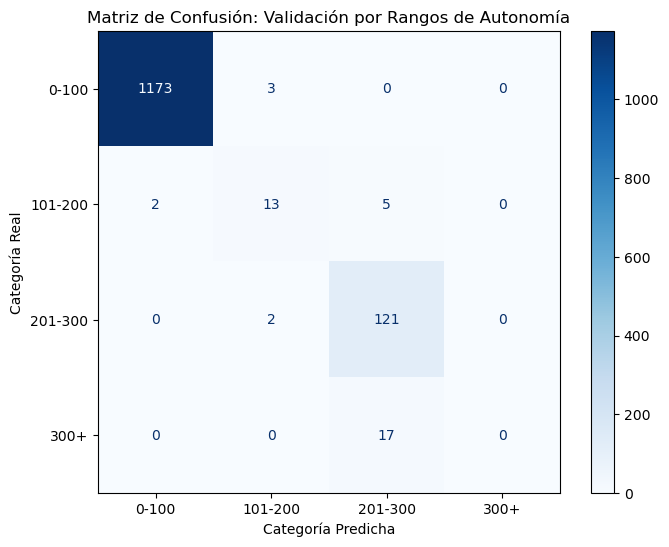

In [38]:
# 4. Visualización profesional
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', ax=ax, values_format='d') # 'd' para números enteros
plt.title("Matriz de Confusión: Validación por Rangos de Autonomía")
plt.xlabel("Categoría Predicha")
plt.ylabel("Categoría Real")
plt.grid(False) # Las matrices de confusión se ven mejor sin rejilla
plt.show()


El análisis conjunto de ambas gráficas revela un modelo con una alta precisión en vehículos de autonomía estándar (0-100 km), donde se concentra la gran mayoría de los datos (1173 casos), pero con una incapacidad crítica para identificar vehículos de alto rendimiento. La matriz de confusión confirma que el modelo no logró predecir ni un solo vehículo en el rango superior a 300 km, clasificando erróneamente a todos esos ejemplares en la categoría inferior de 201-300 km. Esto se traduce visualmente en la gráfica de dispersión como un "techo" donde las predicciones se estabilizan horizontalmente a pesar de que la autonomía real sigue aumentando, lo que sugiere que el algoritmo tiende a ser conservador debido al desbalance de los datos o que le faltan variables clave, como la capacidad de la batería, para distinguir a los vehículos de largo alcance.

In [32]:
# 1. Cargar la extensión
%load_ext watermark

# 2. Generar el reporte
# -v: Versión de Python
# -iv: Versiones de todas las librerías importadas automáticamente
%watermark -v -iv

Python implementation: CPython
Python version       : 3.11.14
IPython version      : 9.9.0

joblib    : 1.5.3
matplotlib: 3.10.8
numpy     : 2.3.5
pandas    : 3.0.0
sklearn   : 1.8.0

